## Problem Statement: Predicting Diamond Prices

The task is to develop a machine learning model that can predict the price of diamonds based on their attributes. The dataset contains information about almost 54,000 diamonds, including features such as carat weight, cut quality, color, clarity, and physical dimensions.

### Objective:
The primary objective is to build a predictive model that accurately estimates the price of diamonds based on their characteristics. This model can be valuable for various stakeholders in the diamond industry, including jewelers, retailers, and consumers.

### Approach:
1. **Data Exploration and Preprocessing:** Analyze the dataset to understand the distribution of features, identify any missing values, and perform necessary preprocessing steps such as encoding categorical variables and handling outliers.
   
2. **Feature Engineering:** Extract additional features if necessary and transform existing features to improve the model's performance.
   
3. **Model Selection:** Experiment with various machine learning algorithms such as linear regression, decision trees, random forests, and gradient boosting to identify the most suitable model for the task.
   
4. **Model Training:** Train the selected model on the preprocessed dataset using appropriate techniques such as cross-validation to optimize hyperparameters.
   
5. **Model Evaluation:** Evaluate the trained model's performance using appropriate evaluation metrics such as mean squared error, mean absolute error, and R-squared score on a held-out test dataset.
   
6. **Model Deployment:** Deploy the trained model into production, allowing stakeholders to make real-time predictions on new diamond data.

### Expected Deliverables:
1. Notebook containing the complete data analysis, preprocessing steps, feature engineering, model training, and evaluation.
   
2. Trained machine learning model serialized and ready for deployment.
   
3. Documentation explaining the model's architecture, data preprocessing steps, and instructions for model deployment and usage.

By accurately predicting diamond prices, this model can assist stakeholders in making informed decisions regarding diamond pricing, inventory management, and customer transactions.



# Libraries Used in This Project

Here are the libraries used in this project along with brief descriptions:

- **NumPy (np):** For numerical computing and handling arrays.
- **Pandas (pd):** For data manipulation and analysis.
- **Seaborn (sns):** For statistical data visualization.
- **Matplotlib (mpl):** For creating static, interactive, and animated visualizations.
- **Pyplot (plt):** A submodule of Matplotlib for plotting.
- **PyLab (pylab):** A submodule of Matplotlib for creating interactive plots.
- **OneHotEncoder:** For one-hot encoding categorical variables.
- **LabelEncoder:** For label encoding categorical target variables.
- **train_test_split:** For splitting data into train and test sets.
- **StandardScaler:** For standardizing features by removing the mean and scaling to unit variance.
- **PCA (Principal Component Analysis):** For dimensionality reduction.
- **Pipeline:** For chaining multiple estimators into a single pipeline.
- **DecisionTreeRegressor:** For building decision tree regression models.
- **RandomForestRegressor:** For building random forest regression models.
- **LinearRegression:** For building linear regression models.
- **XGBRegressor:** For building gradient boosting regression models using XGBoost.
- **KNeighborsRegressor:** For building k-nearest neighbors regression models.
- **cross_val_score:** For evaluating a score by cross-validation.
- **mean_squared_error:** For computing the mean squared error between predicted and true values.
- **metrics:** For various evaluation metrics such as mean absolute error, R-squared score, etc.
- **SciPy:** For scientific computing tasks such as optimization, linear algebra, integration, interpolation, and statistics.
- **StatsModels:** For exploring data, estimating statistical models, and performing statistical tests.
- **Joblib:** For parallelizing code execution and saving Python objects to disk.
- **Scikit-plot:** For easy visualization of scikit-learn estimator performance.
- **Yellowbrick:** For visualizing model performance and diagnostics.



Variable descriptions:


- carat: Carat weight of the diamond.

- cut: Quality of the cut.

- color: Color of the diamond.

- clarity: Clarity of the diamond.

- depth: Total depth percentage.

- table: Width of the top of the diamond relative to the widest point.

- price: Price of the diamond.

- x: Length of the diamond.

- y: Width of the diamond.

- z: Depth of the diamond.

In [1]:
# Importing necessary libraries for the project
import numpy as np  # Numerical computing
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Statistical data visualization
import matplotlib as mpl  # Plotting
import matplotlib.pyplot as plt  # Plotting
import matplotlib.pylab as pylab  # Plotting
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Preprocessing
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import StandardScaler  # Data preprocessing
from sklearn.decomposition import PCA  # Dimensionality reduction
from sklearn.pipeline import Pipeline  # Model pipeline
from sklearn.tree import DecisionTreeRegressor  # Regression model
from sklearn.ensemble import RandomForestRegressor  # Regression model
from sklearn.linear_model import LinearRegression  # Regression model
from xgboost import XGBRegressor  # Gradient boosting regression model
from sklearn.neighbors import KNeighborsRegressor  # Regression model
from sklearn.model_selection import cross_val_score  # Model evaluation
from sklearn.metrics import mean_squared_error  # Model evaluation
from sklearn import metrics  # Model evaluation
import scipy  # Scientific computing
import statsmodels.api as sm  # Statistical models
import joblib  # Parallelizing code execution and saving Python objects to disk
import scikitplot as skplt  # Visualization of scikit-learn estimator performance
import yellowbrick  # Visualizing model performance and diagnostics


C:\Users\faisa\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#load the Data
df=pd.read_csv('diamonds.csv')
print(df.head(5))
# drop unamed
df=df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [3]:
from tabulate import tabulate

def dataframe_summary(df):
    """
    Function to provide summary statistics and information about a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    summary (str): Summary information formatted as a string.
    """
    summary = ""

    # DataFrame info
    summary += f"{'DataFrame Info':^50}\n"
    summary += "~" * 50 + "\n"
    summary += f"{df.info()}\n"
    summary += "~" * 50 + "\n\n"

    # Data Types
    summary += f"{'Data Types':^50}\n"
    summary += "~" * 50 + "\n"
    summary += f"{tabulate(pd.DataFrame(df.dtypes), headers=['Column', 'Data Type'], tablefmt='plain')}\n"
    summary += "~" * 50 + "\n\n"

    # DataFrame description
    summary += f"{'Data Description':^50}\n"
    summary += "~" * 50 + "\n"
    summary += f"{df.describe()}\n"
    summary += "~" * 50 + "\n\n"

    # Drop duplicates
    df.drop_duplicates(inplace=True)
    summary += f"{'Duplicate Rows':^50}\n"
    summary += "~" * 50 + "\n"
    duplicated_rows = df[df.duplicated()]
    if not duplicated_rows.empty:
        summary += f"{duplicated_rows}\n"
    else:
        summary += "No duplicate rows\n"
    summary += "~" * 50 + "\n\n"

    # Null values
    summary += f"{'Null Values':^50}\n"
    summary += "~" * 50 + "\n"
    summary += f"{df.isnull().sum()}\n"
    summary += "~" * 50 + "\n\n"

    # DataFrame shape
    summary += f"{'DataFrame Shape':^50}\n"
    summary += "~" * 50 + "\n"
    summary += f"{df.shape}\n"
    summary += "~" * 50 + "\n\n"

    # DataFrame head
    summary += f"{'First 5 Rows':^50}\n"
    summary += "~" * 50 + "\n"
    summary += f"{df.head()}\n"
    summary += "~" * 50 + "\n\n"

    return summary

# Example usage:
summary = dataframe_summary(df)
print(summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
                  DataFrame Info                  
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                    Data Types                    
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column    Data Type
carat     float64
cut       object
color     object
clarity   object
depth     float64
table

## Imp observation in  5-Point Summary:
- The 5-point summary of the dimensions (length, width, and depth) of the diamonds reveals that there are data points with one or two dimensions being 0. 
- This suggests the presence of diamonds with either 1-dimensional (1D) or 2-dimensional (2D) measurements, which are not practically feasible or useful. 
- These values are likely to be erroneous or faulty data entries and should be treated accordingly during data preprocessing to ensure the integrity of the dataset.

In [4]:
# Dropping dimensionless diamonds from the DataFrame 'df'

# Drop rows where 'x' dimension is 0
df = df.drop(df[df["x"]==0].index)

# Drop rows where 'y' dimension is 0
df = df.drop(df[df["y"]==0].index)

# Drop rows where 'z' dimension is 0
df = df.drop(df[df["z"]==0].index)

# Display the shape of the DataFrame after dropping dimensionless diamonds
print("Shape of DataFrame after dropping dimensionless diamonds:", df.shape)


Shape of DataFrame after dropping dimensionless diamonds: (53775, 10)


In [5]:
# check after drop
df.describe()

carat         depth         table         price             x  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.797536     61.748232     57.457806   3931.220288      5.731579   
std        0.473169      1.429639      2.233257   3985.918716      1.118611   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53775.000000  53775.000000  
mean       5.734909      3.539964  
std        1.139451      0.702017  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

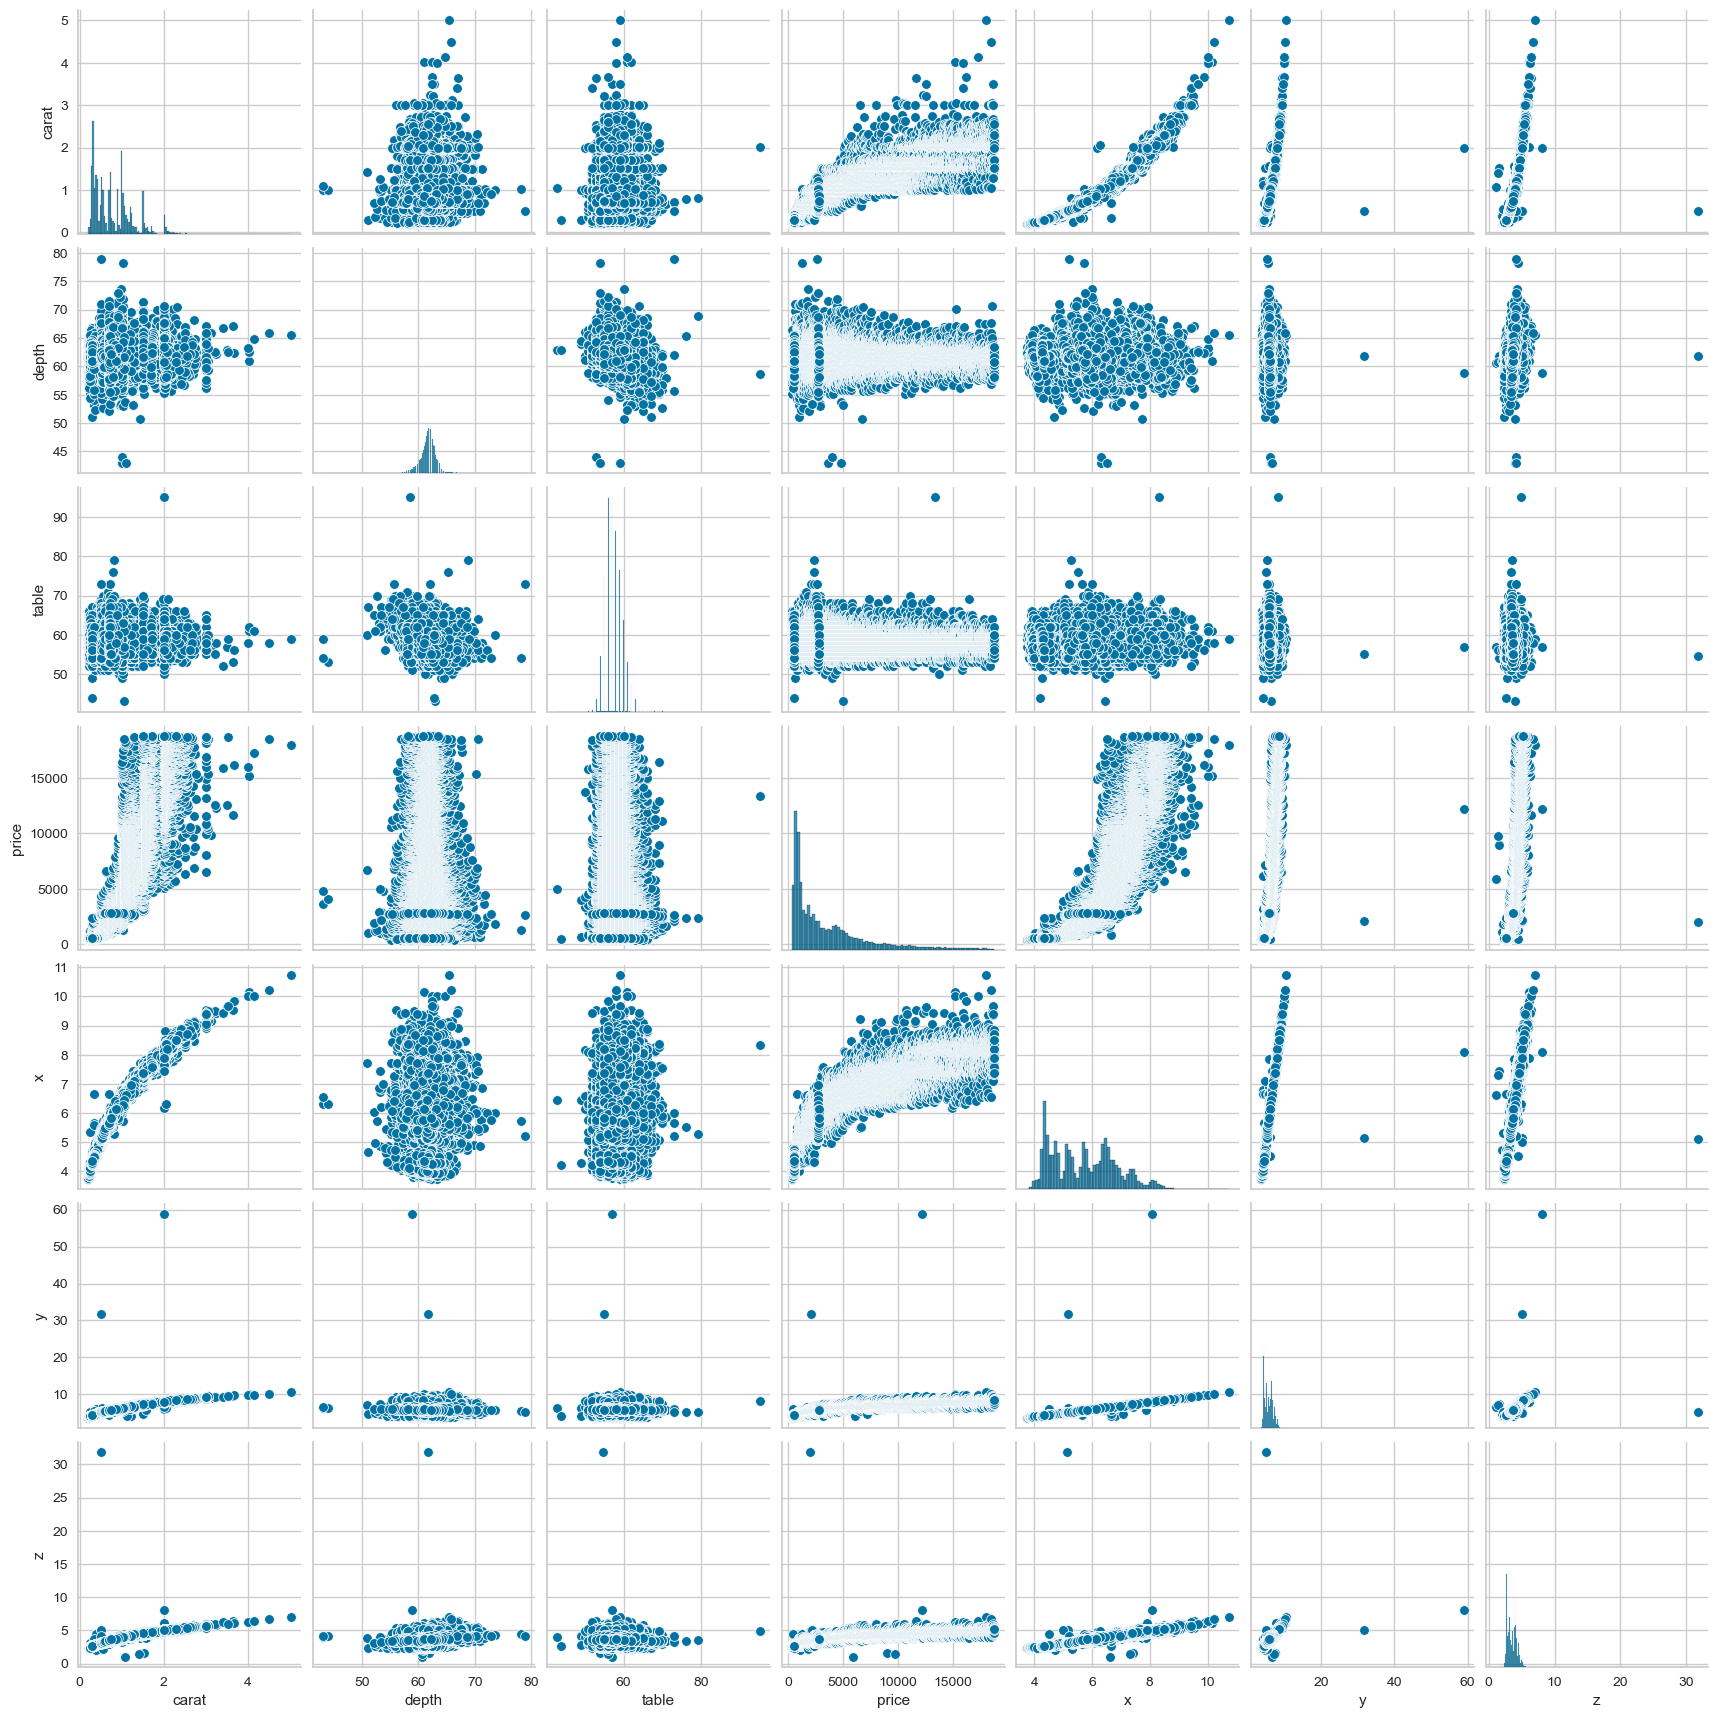

In [6]:
sns.pairplot(df)
plt.show()

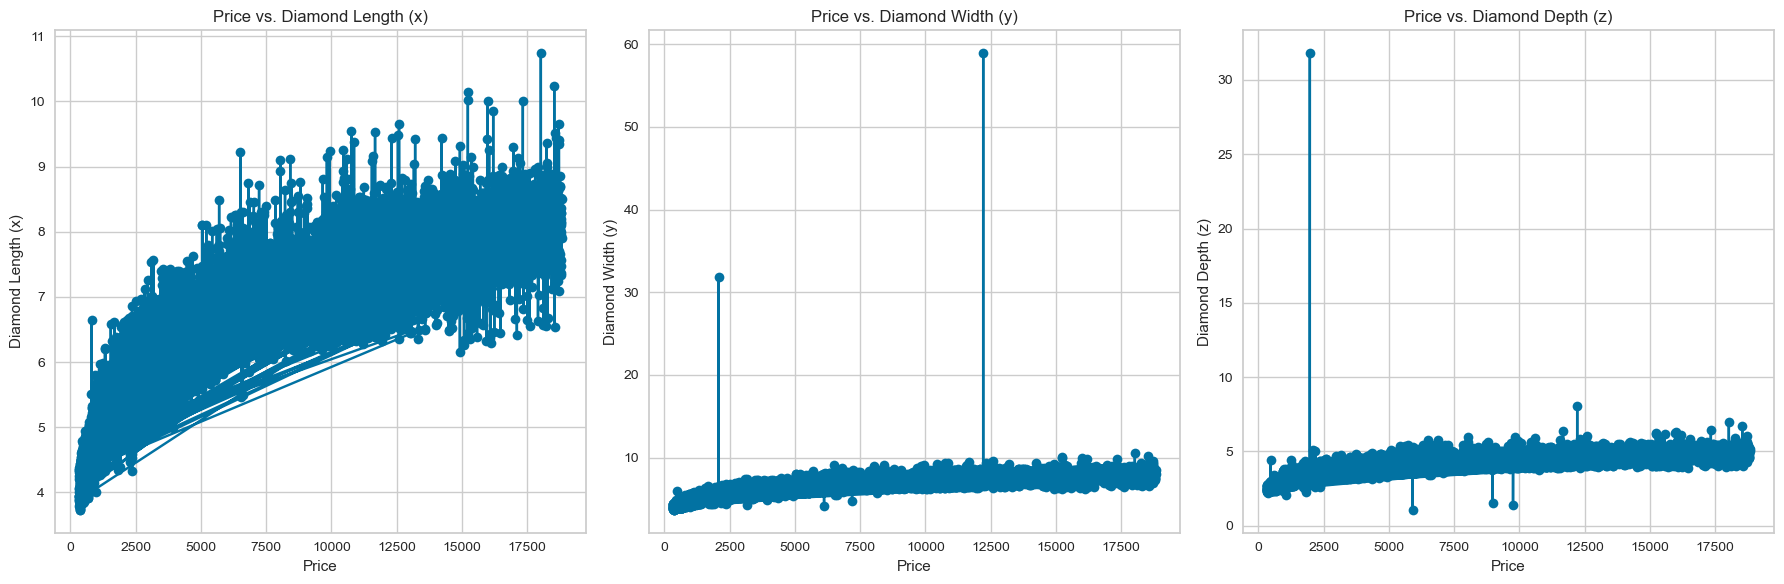

In [7]:
# Plotting line plots of diamond length ('x'), width ('y'), and depth ('z') against price in subplots

import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plotting diamond length ('x') against price
axs[0].plot(df['price'], df['x'], marker='o', linestyle='-')
axs[0].set_title('Price vs. Diamond Length (x)')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Diamond Length (x)')
axs[0].grid(True)

# Plotting diamond width ('y') against price
axs[1].plot(df['price'], df['y'], marker='o', linestyle='-')
axs[1].set_title('Price vs. Diamond Width (y)')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Diamond Width (y)')
axs[1].grid(True)

# Plotting diamond depth ('z') against price
axs[2].plot(df['price'], df['z'], marker='o', linestyle='-')
axs[2].set_title('Price vs. Diamond Depth (z)')
axs[2].set_xlabel('Price')
axs[2].set_ylabel('Diamond Depth (z)')
axs[2].grid(True)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

plt.show()


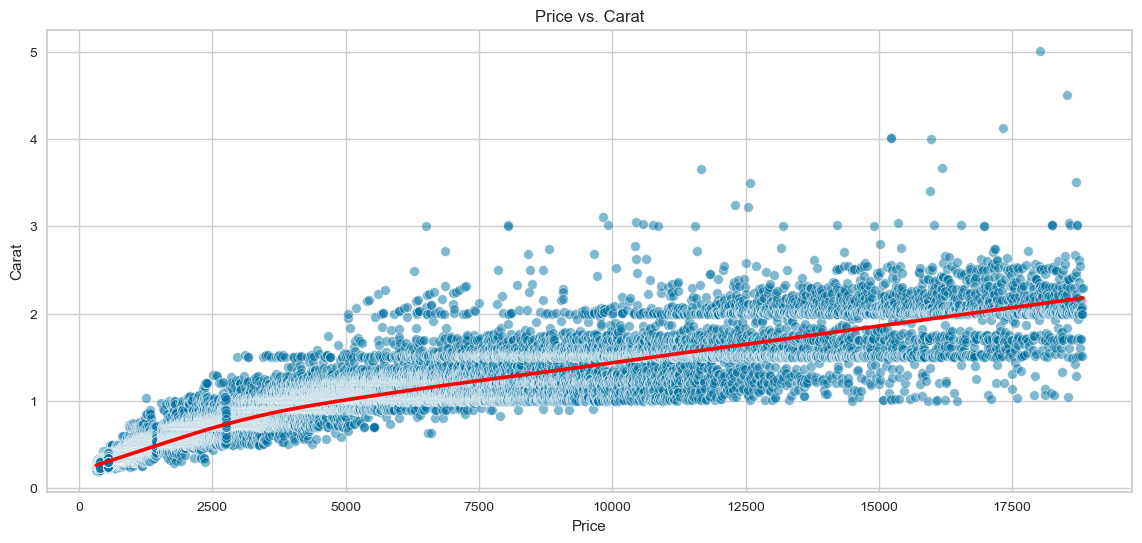

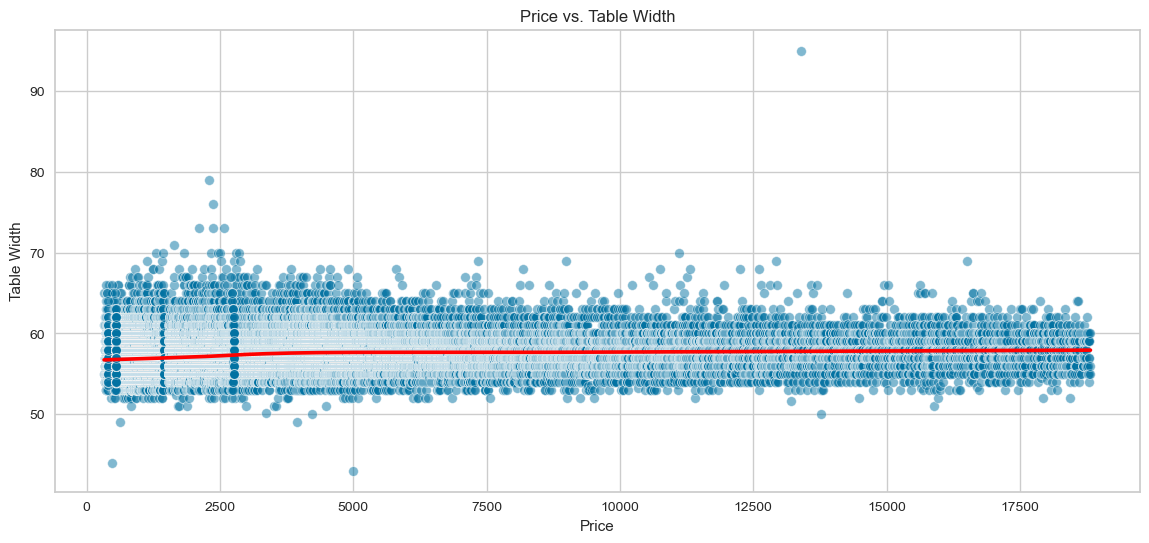

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond carat weight against price
sns.scatterplot(x='price', y='carat', data=df, alpha=0.5)
sns.regplot(x='price', y='carat', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Carat')
plt.xlabel('Price')
plt.ylabel('Carat')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond table width against price
sns.scatterplot(x='price', y='table', data=df, alpha=0.5)
sns.regplot(x='price', y='table', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Table Width')
plt.xlabel('Price')
plt.ylabel('Table Width')
plt.grid(True)
plt.show()


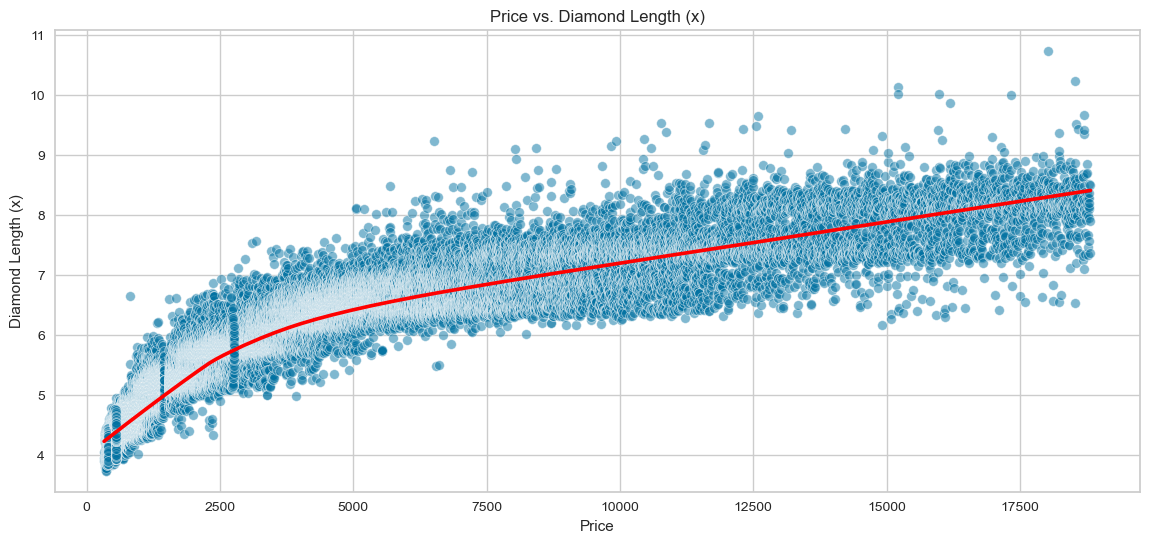

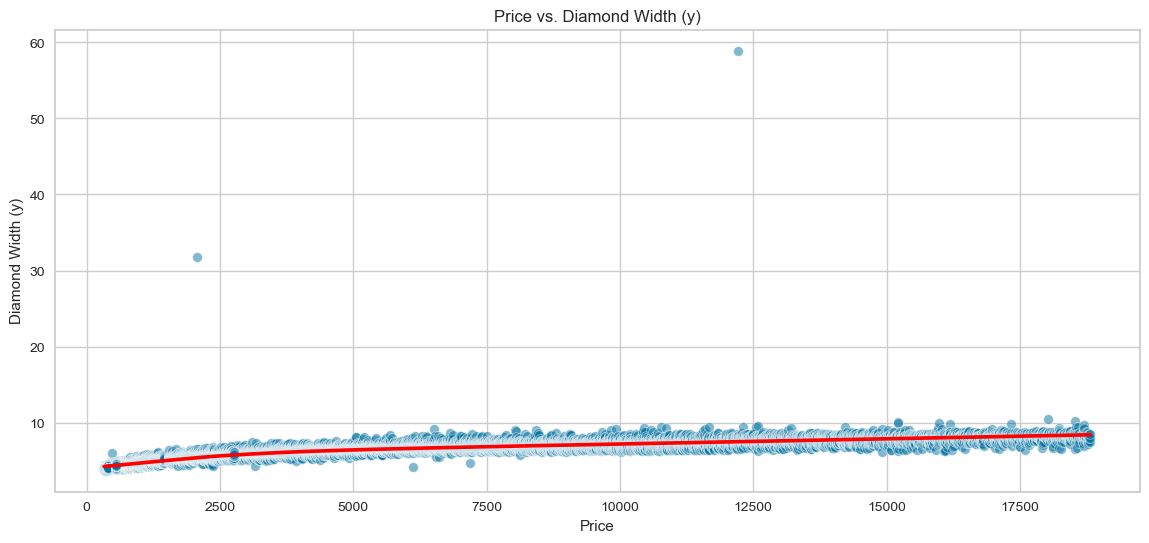

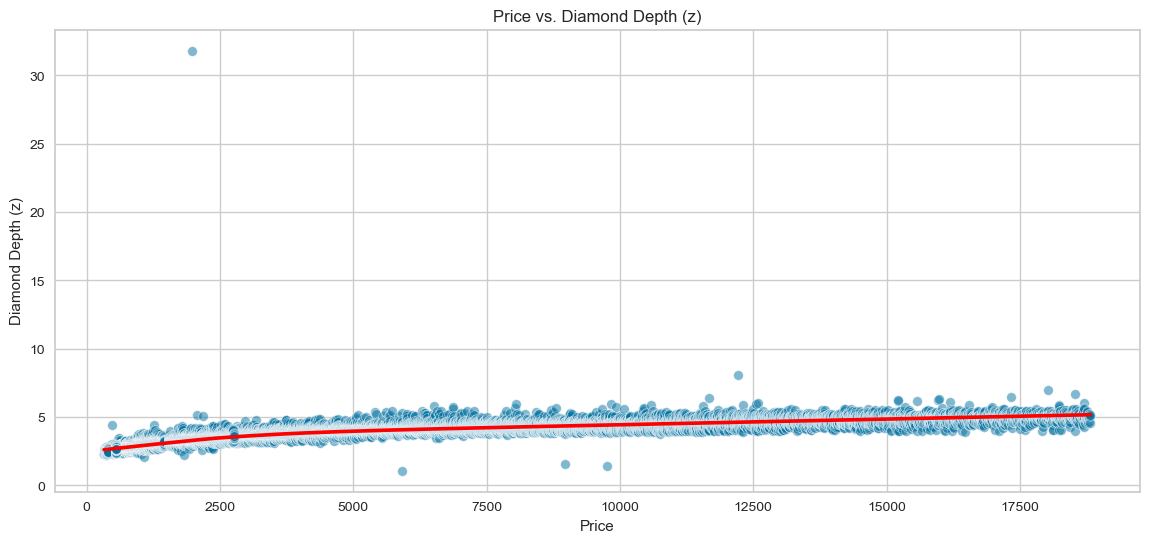

In [9]:
plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond length (x) against price
sns.scatterplot(x='price', y='x', data=df, alpha=0.5)
sns.regplot(x='price', y='x', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Diamond Length (x)')
plt.xlabel('Price')
plt.ylabel('Diamond Length (x)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond width (y) against price
sns.scatterplot(x='price', y='y', data=df, alpha=0.5)
sns.regplot(x='price', y='y', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Diamond Width (y)')
plt.xlabel('Price')
plt.ylabel('Diamond Width (y)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond depth (z) against price
sns.scatterplot(x='price', y='z', data=df, alpha=0.5)
sns.regplot(x='price', y='z', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Diamond Depth (z)')
plt.xlabel('Price')
plt.ylabel('Diamond Depth (z)')
plt.grid(True)
plt.show()


In [10]:
def remove_outliers(df):
    """
    Remove outliers from specific columns in the DataFrame and save changes back to df.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    None (modifies the original DataFrame in place).
    """
    # Columns to check for outliers
    columns_to_check = ['depth', 'table', 'x', 'y', 'z']

    # Iterate through each column
    for col in columns_to_check:
        # Calculate the first quartile (Q1) and third quartile (Q3) of the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers from the column and save changes back to df
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Remove outliers and save changes back to df
df = remove_outliers(df)


In [11]:
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50843 rows x 10 columns]

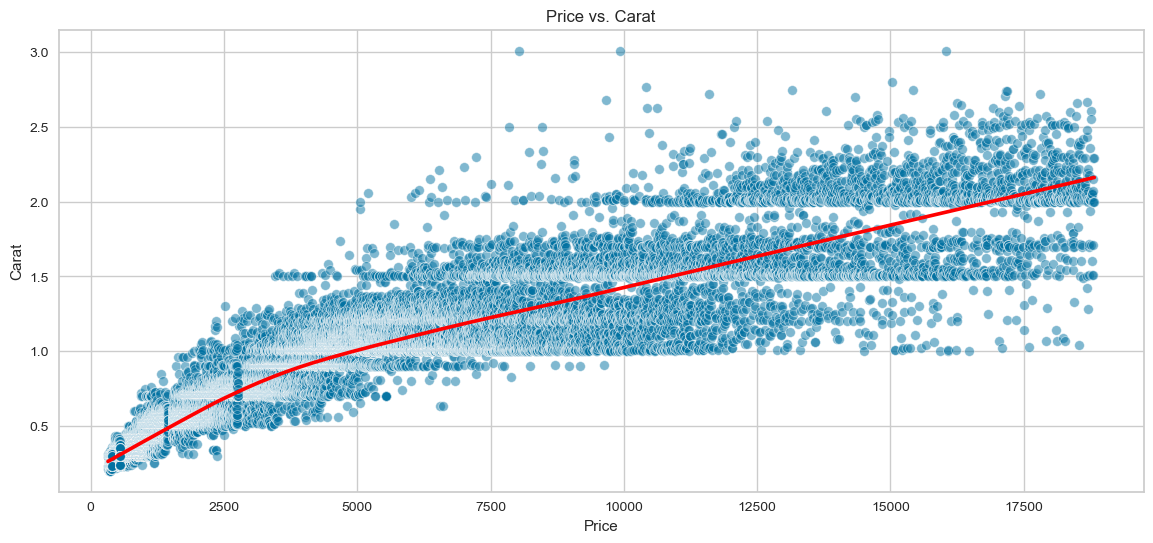

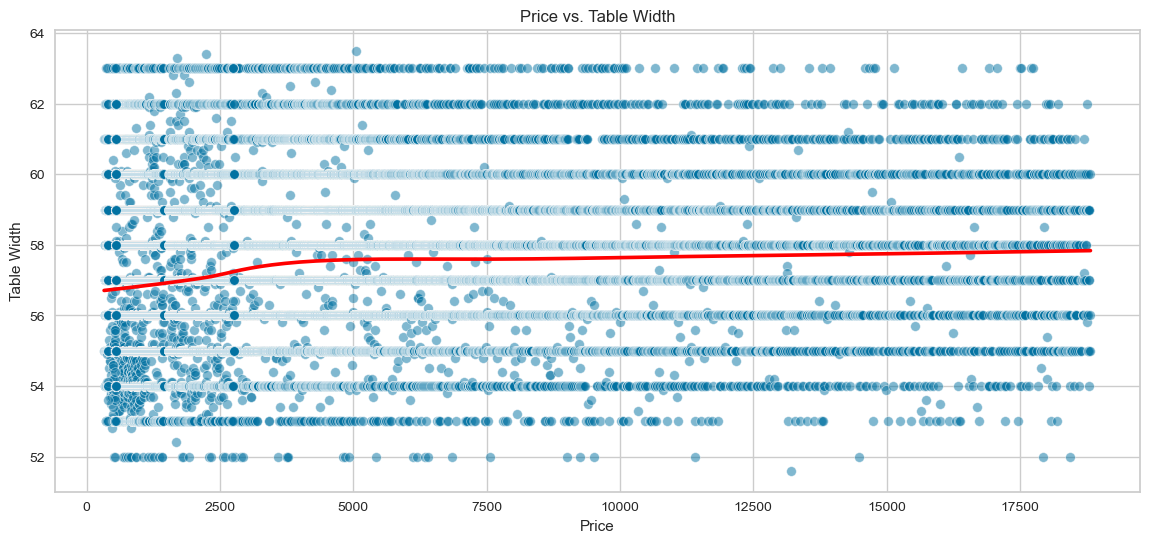

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond carat weight against price
sns.scatterplot(x='price', y='carat', data=df, alpha=0.5)
sns.regplot(x='price', y='carat', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Carat')
plt.xlabel('Price')
plt.ylabel('Carat')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond table width against price
sns.scatterplot(x='price', y='table', data=df, alpha=0.5)
sns.regplot(x='price', y='table', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Table Width')
plt.xlabel('Price')
plt.ylabel('Table Width')
plt.grid(True)
plt.show()


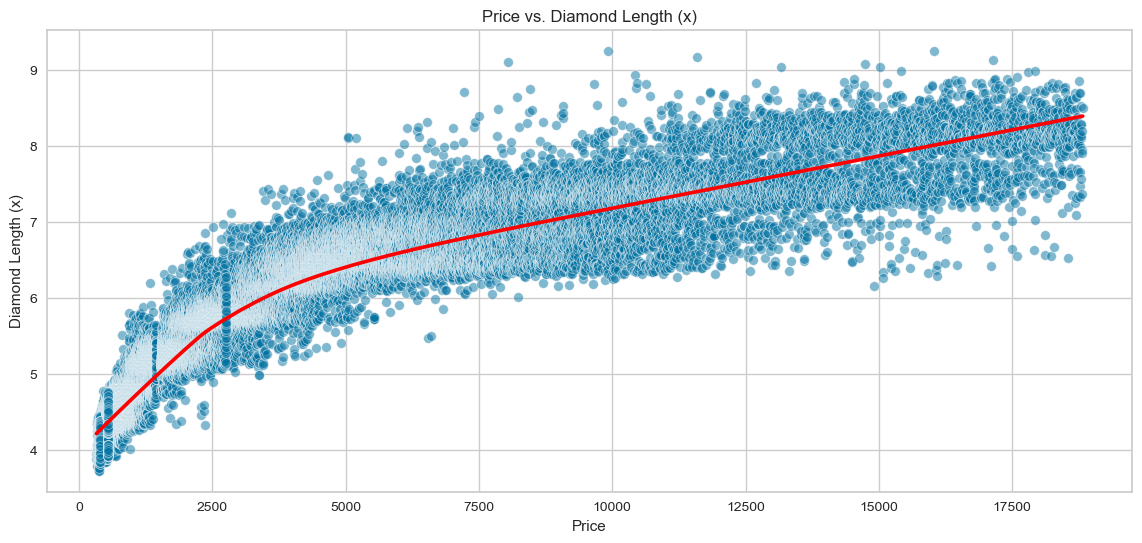

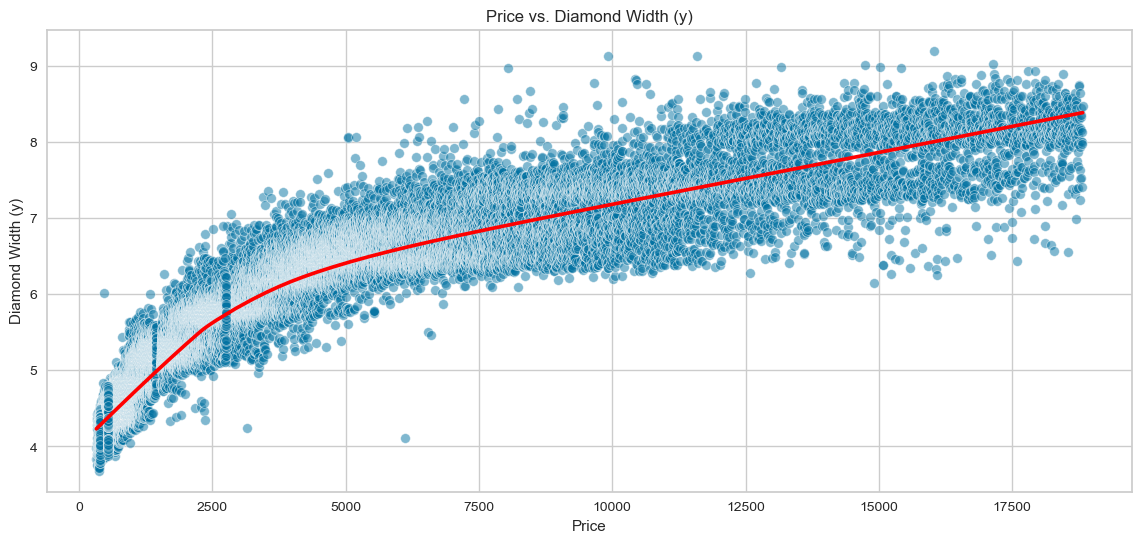

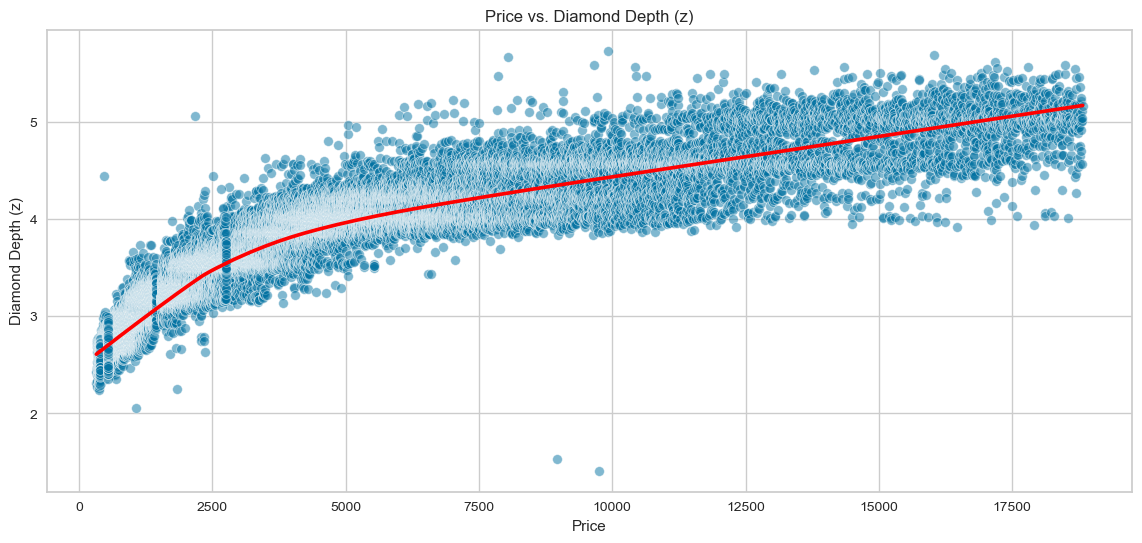

In [13]:
plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond length (x) against price
sns.scatterplot(x='price', y='x', data=df, alpha=0.5)
sns.regplot(x='price', y='x', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Diamond Length (x)')
plt.xlabel('Price')
plt.ylabel('Diamond Length (x)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond width (y) against price
sns.scatterplot(x='price', y='y', data=df, alpha=0.5)
sns.regplot(x='price', y='y', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Diamond Width (y)')
plt.xlabel('Price')
plt.ylabel('Diamond Width (y)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))

# Scatter plot with smoothed trend line for diamond depth (z) against price
sns.scatterplot(x='price', y='z', data=df, alpha=0.5)
sns.regplot(x='price', y='z', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Price vs. Diamond Depth (z)')
plt.xlabel('Price')
plt.ylabel('Diamond Depth (z)')
plt.grid(True)
plt.show()


In [14]:
correlation_matrix = df[['price', 'x', 'y', 'z', 'carat']].corr()
correlation_matrix.style.background_gradient(cmap='hot')


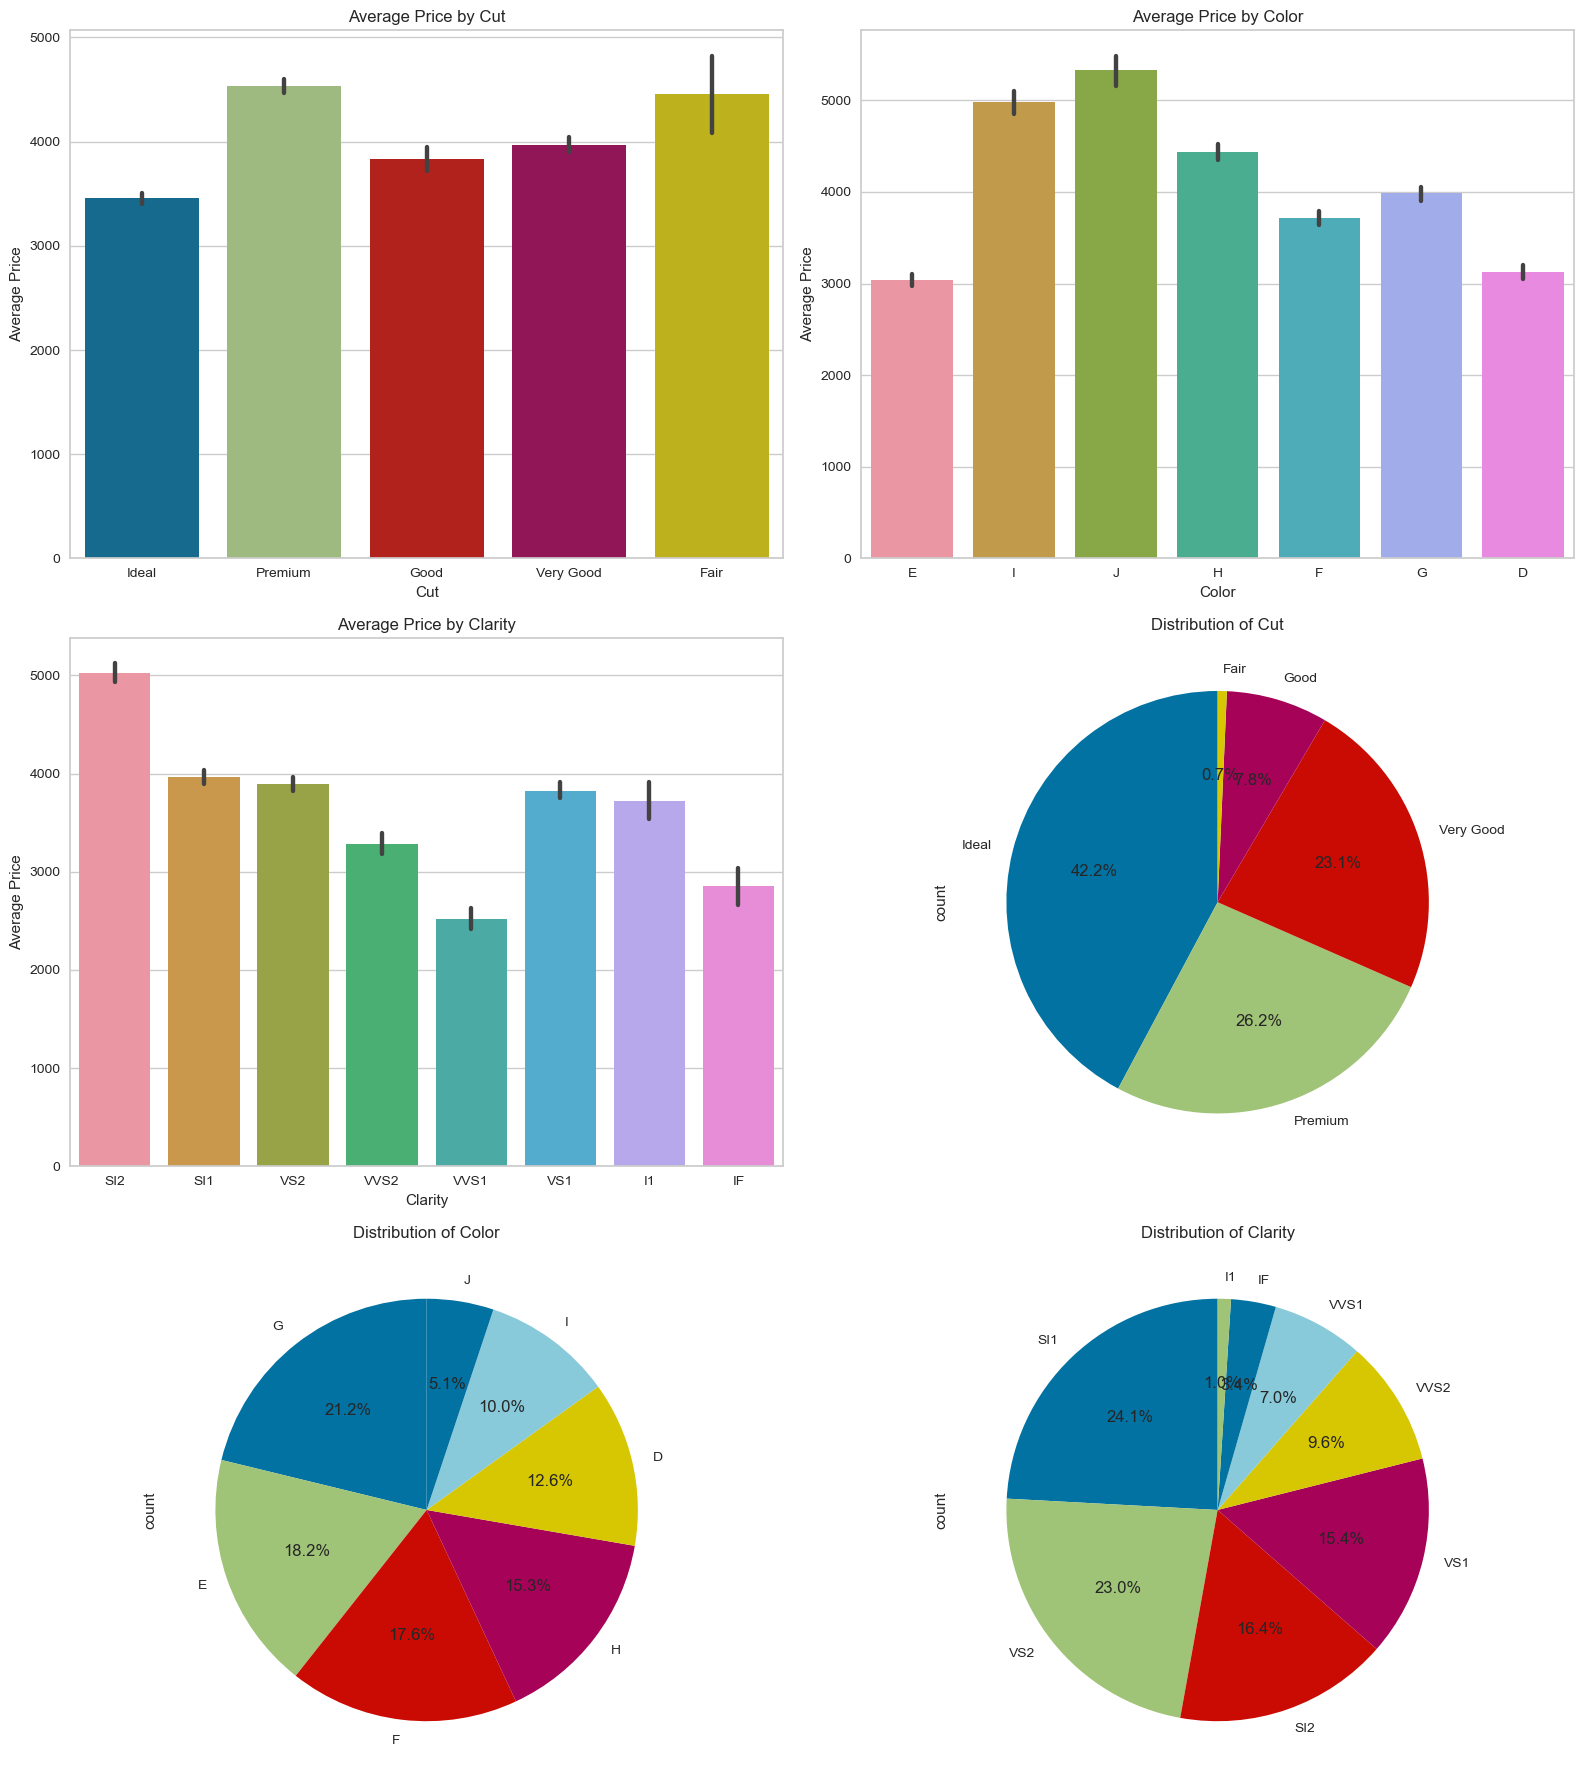

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

# Plot bar plots for 'cut', 'color', and 'clarity' against price
sns.barplot(x='cut', y='price', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Average Price by Cut')
axs[0, 0].set_xlabel('Cut')
axs[0, 0].set_ylabel('Average Price')

sns.barplot(x='color', y='price', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Average Price by Color')
axs[0, 1].set_xlabel('Color')
axs[0, 1].set_ylabel('Average Price')

sns.barplot(x='clarity', y='price', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Average Price by Clarity')
axs[1, 0].set_xlabel('Clarity')
axs[1, 0].set_ylabel('Average Price')

# Plot pie charts for 'cut', 'color', and 'clarity'
df['cut'].value_counts().plot.pie(ax=axs[1, 1], autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Distribution of Cut')

df['color'].value_counts().plot.pie(ax=axs[2, 0], autopct='%1.1f%%', startangle=90)
axs[2, 0].set_title('Distribution of Color')

df['clarity'].value_counts().plot.pie(ax=axs[2, 1], autopct='%1.1f%%', startangle=90)
axs[2, 1].set_title('Distribution of Clarity')

plt.tight_layout()
plt.show()


## storing columns in groups based on data types


In [16]:
categorical_columns = [column for column in df.columns if df[column].dtype == "object"]

### Label Encoding

In [17]:
labeled_data=df.copy()

label_encoder=LabelEncoder()

for col in categorical_columns:
    labeled_data[col]=label_encoder.fit_transform(labeled_data[col])

labeled_data.head()


carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
5   0.24    4      6        7   62.8   57.0    336  3.94  3.96  2.48

## Model Building Process

In [18]:
# Assigning the featurs as X and target as y
X= labeled_data.drop(["price"],axis =1)
y= labeled_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [24]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [25]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1272.723242 
DecisionTree: -741.598261 
RandomForest: -546.000307 
KNeighbors: -834.752864 
XGBRegressor: -540.828872 


In [26]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [27]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9841844162211827
Adjusted R^2: 0.984173209209608
MAE: 261.06134670876696
MSE: 256426.5852686183
RMSE: 506.3858067408864
